## TAREA 09

### *UUnidad 04-A-B | Eliminación gaussiana vs Gauss-Jordan*

Nombre: Alegria Isabel Farinango Farinango

Fecha: 05/01/2026 

Link: 

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

EJERCICIO 1: Resolución gráfica de sistemas lineales

In [28]:
def ejercicio_1():
    """Resuelve sistemas lineales con métodos gráficos"""

    print("EJERCICIO 1: Métodos Gráficos")

    
    # a) x1 + 2x2 = 0, x1 - x2 = 0
    print("\na) Sistema: x1 + 2x2 = 0, x1 - x2 = 0")
    fig, axes = plt.subplots(2, 2, figsize=(14, 12))
    
    x = np.linspace(-5, 5, 100)
    
    # Sistema a
    ax = axes[0, 0]
    y1 = -x / 2  # x1 + 2x2 = 0
    y2 = x       # x1 - x2 = 0
    ax.plot(x, y1, 'b-', label='x₁ + 2x₂ = 0', linewidth=2)
    ax.plot(x, y2, 'r-', label='x₁ - x₂ = 0', linewidth=2)
    ax.plot(0, 0, 'go', markersize=10, label='Solución (0, 0)')
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.legend()
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('Sistema a) - Solución única')
    print("  Solución: x1 = 0, x2 = 0 (las rectas se intersectan en un punto)")
    
    # Sistema b: x1 + 2x2 = 3, -2x1 - 4x2 = 6
    print("\nb) Sistema: x1 + 2x2 = 3, -2x1 - 4x2 = 6")
    ax = axes[0, 1]
    y1 = (3 - x) / 2   # x1 + 2x2 = 3
    y2 = (6 + 2*x) / (-4)  # -2x1 - 4x2 = 6 => y = -3/2 - x/2
    ax.plot(x, y1, 'b-', label='x₁ + 2x₂ = 3', linewidth=2)
    ax.plot(x, y2, 'r--', label='-2x₁ - 4x₂ = 6', linewidth=2)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.legend()
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('Sistema b) - Sin solución (rectas paralelas)')
    ax.set_ylim(-5, 5)
    print("  Sin solución: Las rectas son paralelas (sistema inconsistente)")
    
    # Sistema c: 2x1 + x2 = -1, x1 + x2 = 2, x1 - 3x2 = 5
    print("\nc) Sistema: 2x1 + x2 = -1, x1 + x2 = 2, x1 - 3x2 = 5")
    ax = axes[1, 0]
    y1 = -1 - 2*x      # 2x1 + x2 = -1
    y2 = 2 - x         # x1 + x2 = 2
    y3 = (x - 5) / 3   # x1 - 3x2 = 5
    ax.plot(x, y1, 'b-', label='2x₁ + x₂ = -1', linewidth=2)
    ax.plot(x, y2, 'r-', label='x₁ + x₂ = 2', linewidth=2)
    ax.plot(x, y3, 'g-', label='x₁ - 3x₂ = 5', linewidth=2)
    ax.grid(True, alpha=0.3)
    ax.axhline(y=0, color='k', linewidth=0.5)
    ax.axvline(x=0, color='k', linewidth=0.5)
    ax.legend()
    ax.set_xlabel('x₁')
    ax.set_ylabel('x₂')
    ax.set_title('Sistema c) - Sobredeterminado')
    ax.set_ylim(-5, 5)
    print("  Sistema sobredeterminado: 3 ecuaciones, 2 incógnitas")
    print("  No hay punto que satisfaga las tres ecuaciones simultáneamente")
    
    # Sistema d es 3D - mostrar mensaje
    ax = axes[1, 1]
    ax.text(0.5, 0.5, 'Sistema d)\n3 variables (x₁, x₂, x₃)\n\n' +
            '2x₁ + x₂ + x₃ = 1\n2x₁ + 4x₂ - x₃ = -1\n\n' +
            'Sistema 3D: Intersección de planos\n' +
            'Requiere visualización 3D',
            ha='center', va='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    ax.axis('off')
    print("\nd) Sistema 3D: 2x1 + x2 + x3 = 1, 2x1 + 4x2 - x3 = -1")
    print("  Sistema con 3 variables (planos en el espacio)")
    
    plt.tight_layout()
    plt.savefig('ejercicio1_graficos.png', dpi=300, bbox_inches='tight')
    print("\n  Gráfico guardado como 'ejercicio1_graficos.png'")

EJERCICIO 2: Eliminación gaussiana con redondeo de 2 dígitos

In [29]:
def round_2_digits(x):
    """Redondeo a 2 dígitos significativos"""
    if x == 0:
        return 0
    return round(x, 2 - int(np.floor(np.log10(abs(x)))) - 1)

def gauss_elimination_2digit(A, b):
    """Eliminación gaussiana con aritmética de 2 dígitos"""
    n = len(b)
    A = A.astype(float)
    b = b.astype(float)
    
    # Forward elimination
    for k in range(n-1):
        for i in range(k+1, n):
            factor = round_2_digits(A[i,k] / A[k,k])
            for j in range(k, n):
                A[i,j] = round_2_digits(A[i,j] - factor * A[k,j])
            b[i] = round_2_digits(b[i] - factor * b[k])
    
    # Back substitution
    x = np.zeros(n)
    x[n-1] = round_2_digits(b[n-1] / A[n-1,n-1])
    
    for i in range(n-2, -1, -1):
        sum_ax = sum(A[i,j] * x[j] for j in range(i+1, n))
        x[i] = round_2_digits((b[i] - sum_ax) / A[i,i])
    
    return x

def ejercicio_2():
    """Ejercicio 2: Eliminación gaussiana con redondeo de 2 dígitos"""
  
    print("EJERCICIO 2: Eliminación Gaussiana con Redondeo de 2 Dígitos")

    print("Solución exacta: x1 = -1, x2 = 2, x3 = 3\n")
    
    # Sistema a
    print("a) Sistema:")
    A_a = np.array([[-1, 4, 1],
                     [5/3, 2/3, 2/3],
                     [2, 1, 4]], dtype=float)
    b_a = np.array([8, 1, 11], dtype=float)
    print("   -x1 + 4x2 + x3 = 8")
    print("   5/3·x1 + 2/3·x2 + 2/3·x3 = 1")
    print("   2x1 + x2 + 4x3 = 11")
    
    x_a = gauss_elimination_2digit(A_a.copy(), b_a.copy())
    print(f"\n   Solución con redondeo de 2 dígitos:")
    print(f"   x1 = {x_a[0]:.4f}, x2 = {x_a[1]:.4f}, x3 = {x_a[2]:.4f}")
    print(f"   Error: |x1 - (-1)| = {abs(x_a[0] + 1):.4f}, " +
          f"|x2 - 2| = {abs(x_a[1] - 2):.4f}, " +
          f"|x3 - 3| = {abs(x_a[2] - 3):.4f}")
    
    # Sistema b
    print("\nb) Sistema:")
    A_b = np.array([[4, 2, -1],
                     [1/9, 1/9, -1/3],
                     [1, 4, 2]], dtype=float)
    b_b = np.array([-5, -1, 9], dtype=float)
    print("   4x1 + 2x2 - x3 = -5")
    print("   1/9·x1 + 1/9·x2 - 1/3·x3 = -1")
    print("   x1 + 4x2 + 2x3 = 9")
    
    x_b = gauss_elimination_2digit(A_b.copy(), b_b.copy())
    print(f"\n   Solución con redondeo de 2 dígitos:")
    print(f"   x1 = {x_b[0]:.4f}, x2 = {x_b[1]:.4f}, x3 = {x_b[2]:.4f}")
    print(f"   Error: |x1 - (-1)| = {abs(x_b[0] + 1):.4f}, " +
          f"|x2 - 2| = {abs(x_b[1] - 2):.4f}, " +
          f"|x3 - 3| = {abs(x_b[2] - 3):.4f}")

EJERCICIO 3: Eliminación gaussiana estándar

In [30]:
def gauss_elimination_standard(A, b, verbose=False):
    """Eliminación gaussiana estándar con detección de intercambios"""
    n = len(b)
    A = A.astype(float)
    b = b.astype(float)
    swaps = 0
    
    if verbose:
        print("  Matriz aumentada inicial:")
        print_augmented(A, b)
    
    # Forward elimination
    for k in range(n-1):
        if abs(A[k,k]) < 1e-10:
            max_row = max(range(k, n), key=lambda i: abs(A[i,k]))
            if abs(A[max_row,k]) < 1e-10:
                continue
            A[[k, max_row]] = A[[max_row, k]]
            b[[k, max_row]] = b[[max_row, k]]
            swaps += 1
            if verbose:
                print(f"\n  Intercambio de filas {k+1} ↔ {max_row+1}")
        
        for i in range(k+1, n):
            if A[k,k] != 0:
                factor = A[i,k] / A[k,k]
                A[i,k:] -= factor * A[k,k:]
                b[i] -= factor * b[k]
    
    if verbose:
        print("\n  Matriz triangular superior:")
        print_augmented(A, b)
    
    # Back substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        if abs(A[i,i]) < 1e-10:
            return None, swaps
        x[i] = (b[i] - A[i,i+1:] @ x[i+1:]) / A[i,i]
    
    return x, swaps

def ejercicio_3():
    """Ejercicio 3: Eliminación gaussiana con intercambios"""
    sistemas = [
        ("a", [[1,-1,3],[3,-3,1],[1,1,0]], [2,-1,3]),
        ("b", [[2,-1.5,3],[-1,0,2],[4,-4.5,5]], [1,3,1]),
        ("c", [[2,0,0],[1,1.5,0],[0,-3,0.5]], [3,4.5,-6.6]),
        ("d", [[1,1,0,1],[2,1,-1,1],[4,-1,-2,2],[3,-1,-1,2]], [2,1,0,-3])
    ]
    
    for label, A, b in sistemas:
        print(f"\n{'='*80}\nSistema {label}):")
        x, swaps = gauss_elimination_standard(np.array(A, float), np.array(b, float), True)
        if x is not None:
            print(f"\n  Solución: {', '.join(f'x{i+1}={x[i]:.6f}' for i in range(len(x)))}")
            print(f"  Intercambios: {swaps}")

EJERCICIO 4: Eliminación gaussiana con precisión de 32 bits

In [31]:
def gauss_elimination_32bit(A, b, verbose=False):
    """Eliminación gaussiana con precisión de 32 bits (float32)"""
    n = len(b)
    A = A.astype(np.float32)
    b = b.astype(np.float32)
    
    if verbose:
        print("  Matriz aumentada inicial:")
        print_augmented(A, b)
    
    # Forward elimination
    for k in range(n-1):
        for i in range(k+1, n):
            if A[k,k] != 0:
                factor = np.float32(A[i,k] / A[k,k])
                for j in range(k, n):
                    A[i,j] = np.float32(A[i,j] - factor * A[k,j])
                b[i] = np.float32(b[i] - factor * b[k])
    
    if verbose:
        print("\n  Matriz triangular superior:")
        print_augmented(A, b)
    
    # Back substitution
    x = np.zeros(n, dtype=np.float32)
    for i in range(n-1, -1, -1):
        if abs(A[i,i]) < 1e-10:
            print(f"  Sistema singular")
            return None
        sum_val = np.float32(0)
        for j in range(i+1, n):
            sum_val = np.float32(sum_val + A[i,j] * x[j])
        x[i] = np.float32((b[i] - sum_val) / A[i,i])
    
    return x

def ejercicio_4():
    """Ejercicio 4: Eliminación gaussiana con precisión de 32 bits"""
    print("\n" + "=" * 80)
    print("EJERCICIO 4: Eliminación Gaussiana con Precisión de 32 bits")
    print("=" * 80)
    
    # Sistema a - Matriz de Hilbert modificada
    print("\na) Sistema (matriz de Hilbert modificada):")
    print("   1/4·x1 + 1/5·x2 + 1/6·x3 = 9")
    print("   1/3·x1 + 1/4·x2 + 1/5·x3 = 8")
    print("   1/2·x1 + x2 + 2x3 = 8")
    
    A_a = np.array([[1/4, 1/5, 1/6],
                     [1/3, 1/4, 1/5],
                     [1/2, 1, 2]], dtype=np.float64)
    b_a = np.array([9, 8, 8], dtype=np.float64)
    
    x_a_32 = gauss_elimination_32bit(A_a.copy(), b_a.copy(), verbose=False)
    x_a_64 = np.linalg.solve(A_a, b_a)  # Solución con precisión doble
    
    print(f"\n   Solución con float32: x1={x_a_32[0]:.8f}, x2={x_a_32[1]:.8f}, x3={x_a_32[2]:.8f}")
    print(f"   Solución con float64: x1={x_a_64[0]:.8f}, x2={x_a_64[1]:.8f}, x3={x_a_64[2]:.8f}")
    print(f"   Diferencia: Δx1={abs(x_a_32[0]-x_a_64[0]):.2e}, " +
          f"Δx2={abs(x_a_32[1]-x_a_64[1]):.2e}, " +
          f"Δx3={abs(x_a_32[2]-x_a_64[2]):.2e}")
    
    # Sistema b
    print("\n" + "-" * 80)
    print("b) Sistema:")
    print("   3.333x1 + 15920x2 - 10.333x3 = 15913")
    print("   2.222x1 + 16.71x2 + 9.612x3 = 28.544")
    print("   1.5611x1 + 5.1791x2 + 1.6852x3 = 8.4254")
    
    A_b = np.array([[3.333, 15920, -10.333],
                     [2.222, 16.71, 9.612],
                     [1.5611, 5.1791, 1.6852]], dtype=np.float64)
    b_b = np.array([15913, 28.544, 8.4254], dtype=np.float64)
    
    x_b_32 = gauss_elimination_32bit(A_b.copy(), b_b.copy(), verbose=False)
    x_b_64 = np.linalg.solve(A_b, b_b)
    
    print(f"\n   Solución con float32: x1={x_b_32[0]:.8f}, x2={x_b_32[1]:.8f}, x3={x_b_32[2]:.8f}")
    print(f"   Solución con float64: x1={x_b_64[0]:.8f}, x2={x_b_64[1]:.8f}, x3={x_b_64[2]:.8f}")
    print(f"   Diferencia: Δx1={abs(x_b_32[0]-x_b_64[0]):.2e}, " +
          f"Δx2={abs(x_b_32[1]-x_b_64[1]):.2e}, " +
          f"Δx3={abs(x_b_32[2]-x_b_64[2]):.2e}")
    print("   ⚠ Sistema mal condicionado - errores significativos con float32")
    
    # Sistema c - Matriz de Hilbert 4x4
    print("\n" + "-" * 80)
    print("c) Sistema 4x4 (matriz de Hilbert):")
    print("   x1 + 1/2·x2 + 1/3·x3 + 1/4·x4 = 1/6")
    print("   1/2·x1 + 1/3·x2 + 1/4·x3 + 1/5·x4 = 1/7")
    print("   1/3·x1 + 1/4·x2 + 1/5·x3 + 1/6·x4 = 1/8")
    print("   1/4·x1 + 1/5·x2 + 1/6·x3 + 1/7·x4 = 1/9")
    
    A_c = np.array([[1, 1/2, 1/3, 1/4],
                     [1/2, 1/3, 1/4, 1/5],
                     [1/3, 1/4, 1/5, 1/6],
                     [1/4, 1/5, 1/6, 1/7]], dtype=np.float64)
    b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float64)
    
    x_c_32 = gauss_elimination_32bit(A_c.copy(), b_c.copy(), verbose=False)
    x_c_64 = np.linalg.solve(A_c, b_c)
    
    print(f"\n   Solución con float32:")
    print(f"   x1={x_c_32[0]:.8f}, x2={x_c_32[1]:.8f}, x3={x_c_32[2]:.8f}, x4={x_c_32[3]:.8f}")
    print(f"   Solución con float64:")
    print(f"   x1={x_c_64[0]:.8f}, x2={x_c_64[1]:.8f}, x3={x_c_64[2]:.8f}, x4={x_c_64[3]:.8f}")
    print(f"   Diferencias: Δx1={abs(x_c_32[0]-x_c_64[0]):.2e}, " +
          f"Δx2={abs(x_c_32[1]-x_c_64[1]):.2e}, " +
          f"Δx3={abs(x_c_32[2]-x_c_64[2]):.2e}, " +
          f"Δx4={abs(x_c_32[3]-x_c_64[3]):.2e}")
    print("   ⚠ Matriz de Hilbert muy mal condicionada")
    print(f"   Número de condición: {np.linalg.cond(A_c):.2e}")
    
    # Sistema d - 5x5
    print("\n" + "-" * 80)
    print("d) Sistema 5x5:")
    A_d = np.array([[2, 1, -1, 1, -3],
                     [1, 0, 2, -1, 1],
                     [0, -2, -1, 1, -1],
                     [3, 1, -4, 0, 5],
                     [1, -1, -1, -1, 1]], dtype=np.float64)
    b_d = np.array([7, 2, -5, 6, -3], dtype=np.float64)
    
    x_d_32 = gauss_elimination_32bit(A_d.copy(), b_d.copy(), verbose=False)
    x_d_64 = np.linalg.solve(A_d, b_d)
    
    print(f"\n   Solución con float32:")
    for i in range(5):
        print(f"   x{i+1}={x_d_32[i]:.8f}", end="  ")
    print(f"\n   Solución con float64:")
    for i in range(5):
        print(f"   x{i+1}={x_d_64[i]:.8f}", end="  ")
    print(f"\n   Diferencias máximas: {np.max(np.abs(x_d_32 - x_d_64)):.2e}")

Método Gauss-Jordan

In [32]:
def gauss_jordan_32bit(A, b, verbose=False):
    """Método Gauss-Jordan con precisión de 32 bits"""
    n = len(b)
    # Crear matriz aumentada
    Aug = np.hstack([A.astype(np.float32), b.reshape(-1, 1).astype(np.float32)])
    
    if verbose:
        print("  Matriz aumentada inicial:")
        print(Aug)
    
    # Eliminación hacia adelante y atrás (forma escalonada reducida)
    for k in range(n):
        # Normalizar fila k
        if Aug[k,k] == 0:
            print("  Error: Pivote cero")
            return None
        
        pivot = np.float32(Aug[k,k])
        Aug[k,:] = Aug[k,:] / pivot
        
        # Eliminar en todas las otras filas
        for i in range(n):
            if i != k:
                factor = np.float32(Aug[i,k])
                Aug[i,:] = np.float32(Aug[i,:] - factor * Aug[k,:])
        
        if verbose:
            print(f"\n  Después de eliminar columna {k+1}:")
            print(Aug)
    
    # La última columna contiene la solución
    x = Aug[:, -1]
    return x

def ejercicio_7():
    """Método Gauss-Jordan"""
 
    print("Método Gauss-Jordan (Ejercicio 4 repetido)")
 
    print("\nEl método Gauss-Jordan produce la forma escalonada reducida")
    print("(matriz identidad en el lado izquierdo)\n")
    
    # Sistema a
    print("a) Sistema (matriz de Hilbert modificada):")
    A_a = np.array([[1/4, 1/5, 1/6],
                     [1/3, 1/4, 1/5],
                     [1/2, 1, 2]], dtype=np.float64)
    b_a = np.array([9, 8, 8], dtype=np.float64)
    
    x_a_gj = gauss_jordan_32bit(A_a.copy(), b_a.copy(), verbose=False)
    x_a_ge = gauss_elimination_32bit(A_a.copy(), b_a.copy(), verbose=False)
    
    print(f"   Solución Gauss-Jordan: x1={x_a_gj[0]:.8f}, x2={x_a_gj[1]:.8f}, x3={x_a_gj[2]:.8f}")
    print(f"   Solución Gauss estándar: x1={x_a_ge[0]:.8f}, x2={x_a_ge[1]:.8f}, x3={x_a_ge[2]:.8f}")
    print(f"   Diferencia entre métodos: {np.max(np.abs(x_a_gj - x_a_ge)):.2e}")
    
    # Sistema b
    print("\n" + "-" * 80)
    print("b) Sistema mal condicionado:")
    A_b = np.array([[3.333, 15920, -10.333],
                     [2.222, 16.71, 9.612],
                     [1.5611, 5.1791, 1.6852]], dtype=np.float64)
    b_b = np.array([15913, 28.544, 8.4254], dtype=np.float64)
    
    x_b_gj = gauss_jordan_32bit(A_b.copy(), b_b.copy(), verbose=False)
    x_b_ge = gauss_elimination_32bit(A_b.copy(), b_b.copy(), verbose=False)
    
    print(f"   Solución Gauss-Jordan: x1={x_b_gj[0]:.8f}, x2={x_b_gj[1]:.8f}, x3={x_b_gj[2]:.8f}")
    print(f"   Solución Gauss estándar: x1={x_b_ge[0]:.8f}, x2={x_b_ge[1]:.8f}, x3={x_b_ge[2]:.8f}")
    print(f"   Diferencia entre métodos: {np.max(np.abs(x_b_gj - x_b_ge)):.2e}")
    
    # Sistema c - Matriz de Hilbert
    print("\n" + "-" * 80)
    print("c) Sistema 4x4 (matriz de Hilbert):")
    A_c = np.array([[1, 1/2, 1/3, 1/4],
                     [1/2, 1/3, 1/4, 1/5],
                     [1/3, 1/4, 1/5, 1/6],
                     [1/4, 1/5, 1/6, 1/7]], dtype=np.float64)
    b_c = np.array([1/6, 1/7, 1/8, 1/9], dtype=np.float64)
    
    x_c_gj = gauss_jordan_32bit(A_c.copy(), b_c.copy(), verbose=False)
    x_c_ge = gauss_elimination_32bit(A_c.copy(), b_c.copy(), verbose=False)
    x_c_exact = np.linalg.solve(A_c, b_c)
    
    print(f"   Solución Gauss-Jordan:")
    for i in range(4):
        print(f"   x{i+1}={x_c_gj[i]:.8f}", end="  ")
    print(f"\n   Solución Gauss estándar:")
    for i in range(4):
        print(f"   x{i+1}={x_c_ge[i]:.8f}", end="  ")
    print(f"\n   Solución exacta (float64):")
    for i in range(4):
        print(f"   x{i+1}={x_c_exact[i]:.8f}", end="  ")
    print(f"\n   Error Gauss-Jordan: {np.max(np.abs(x_c_gj - x_c_exact)):.2e}")
    print(f"   Error Gauss estándar: {np.max(np.abs(x_c_ge - x_c_exact)):.2e}")
    
    # Sistema d
    print("\n" + "-" * 80)
    print("d) Sistema 5x5:")
    A_d = np.array([[2, 1, -1, 1, -3],
                     [1, 0, 2, -1, 1],
                     [0, -2, -1, 1, -1],
                     [3, 1, -4, 0, 5],
                     [1, -1, -1, -1, 1]], dtype=np.float64)
    b_d = np.array([7, 2, -5, 6, -3], dtype=np.float64)
    
    x_d_gj = gauss_jordan_32bit(A_d.copy(), b_d.copy(), verbose=False)
    x_d_ge = gauss_elimination_32bit(A_d.copy(), b_d.copy(), verbose=False)
    
    print(f"   Solución Gauss-Jordan:")
    for i in range(5):
        print(f"   x{i+1}={x_d_gj[i]:.8f}", end="  ")
    print(f"\n   Solución Gauss estándar:")
    for i in range(5):
        print(f"   x{i+1}={x_d_ge[i]:.8f}", end="  ")
    print(f"\n   Diferencia entre métodos: {np.max(np.abs(x_d_gj - x_d_ge)):.2e}")
    
    print("COMPARACIÓN DE MÉTODOS:")
   
    print("• Gauss-Jordan: Produce forma escalonada reducida (identidad)")
    print("• Gauss estándar: Produce forma triangular superior")
    print("• Gauss-Jordan requiere más operaciones (~n³/2 vs ~n³/3)")
    print("• Ambos métodos son sensibles a errores de redondeo en sistemas mal condicionados")

EJERCICIO 5: Sistema paramétrico

In [33]:
def ejercicio_5():
    """Ejercicio 5: Sistema con parámetro alpha"""
   
    print("EJERCICIO 5: Sistema Paramétrico con α")
  
    print("\nSistema:")
    print("  x1 - x2 + αx3 = -2")
    print("  -x1 + 2x2 - αx3 = 3")
    print("  αx1 + x2 + x3 = 2")
    
    print("\nAnálisis del sistema mediante eliminación gaussiana:")
    print("\na) Para que NO tenga soluciones:")
    print("   El sistema no tiene solución cuando el determinante de la")
    print("   matriz de coeficientes es 0 pero el sistema es inconsistente.")
    print("   Aplicando eliminación gaussiana: α = 0")
    print("   Verificación: Con α=0, la tercera ecuación es x2 + x3 = 2")
    print("   pero el sistema reducido es inconsistente.")
    
    print("\nb) Para que tenga infinitas soluciones:")
    print("   El sistema tiene infinitas soluciones cuando hay")
    print("   dependencia lineal y es consistente.")
    print("   No existe tal α para este sistema específico.")
    
    print("\nc) Solución para α específico (ejemplo α = 1):")
    alpha = 1
    A = np.array([[1, -1, alpha],
                  [-1, 2, -alpha],
                  [alpha, 1, 1]], dtype=float)
    b = np.array([-2, 3, 2], dtype=float)
    
    x, _ = gauss_elimination_standard(A.copy(), b.copy(), verbose=False)
    if x is not None:
        print(f"   Para α = {alpha}:")
        print(f"   x1 = {x[0]:.6f}, x2 = {x[1]:.6f}, x3 = {x[2]:.6f}")


EJERCICIO 6: Aplicación - Sistema biológico

In [34]:
def ejercicio_6():
    """Ejercicio 6: Sistema biológico de alimentación"""

    print("EJERCICIO 6: Sistema Biológico de Alimentación")

    
    A = np.array([[1, 2, 0, 3],
                  [1, 0, 2, 2],
                  [0, 0, 1, 1]], dtype=float)
    
    x = np.array([1000, 500, 350, 400], dtype=float)
    b = np.array([3500, 2700, 900], dtype=float)
    
    print("\nMatriz de consumo A:")
    print(A)
    print("\nPoblaciones x:", x)
    print("Suministro disponible b:", b)
    
    # a) Verificar si hay suficiente alimento
    print("\na) ¿Hay suficiente alimento?")
    consumo = A @ x
    print(f"   Consumo calculado: {consumo}")
    print(f"   Suministro disponible: {b}")
    print(f"   Diferencia (b - Ax): {b - consumo}")
    
    if np.all(consumo <= b + 1e-6):
        print("   ✓ SÍ hay suficiente alimento")
    else:
        print("   ✗ NO hay suficiente alimento")
    
    # b) Máximo incremento individual por especie
    print("\nb) Máximo incremento individual por especie:")
    for j in range(4):
        # Calcular cuánto se puede aumentar la especie j
        column_j = A[:, j]
        slack = b - consumo
        max_increase = np.min(slack / (column_j + 1e-10))
        print(f"   Especie {j+1}: +{max_increase:.2f} animales")
    
    # c) Si especie 1 se extingue
    print("\nc) Si especie 1 se extingue:")
    x_c = x.copy()
    x_c[0] = 0
    consumo_c = A @ x_c
    slack_c = b - consumo_c
    print(f"   Recursos liberados: {slack_c}")
    for j in range(1, 4):
        max_inc = np.min(slack_c / (A[:, j] + 1e-10))
        print(f"   Especie {j+1}: +{max_inc:.2f} animales")
    
    # d) Si especie 2 se extingue
    print("\nd) Si especie 2 se extingue:")
    x_d = x.copy()
    x_d[1] = 0
    consumo_d = A @ x_d
    slack_d = b - consumo_d
    print(f"   Recursos liberados: {slack_d}")
    for j in [0, 2, 3]:
        max_inc = np.min(slack_d / (A[:, j] + 1e-10))
        print(f"   Especie {j+1}: +{max_inc:.2f} animales")

TAREA 09: EJERCICIOS DE ELIMINACIÓN GAUSSIANA
EJERCICIO 1: Métodos Gráficos

a) Sistema: x1 + 2x2 = 0, x1 - x2 = 0
  Solución: x1 = 0, x2 = 0 (las rectas se intersectan en un punto)

b) Sistema: x1 + 2x2 = 3, -2x1 - 4x2 = 6
  Sin solución: Las rectas son paralelas (sistema inconsistente)

c) Sistema: 2x1 + x2 = -1, x1 + x2 = 2, x1 - 3x2 = 5
  Sistema sobredeterminado: 3 ecuaciones, 2 incógnitas
  No hay punto que satisfaga las tres ecuaciones simultáneamente

d) Sistema 3D: 2x1 + x2 + x3 = 1, 2x1 + 4x2 - x3 = -1
  Sistema con 3 variables (planos en el espacio)

  Gráfico guardado como 'ejercicio1_graficos.png'
EJERCICIO 2: Eliminación Gaussiana con Redondeo de 2 Dígitos
Solución exacta: x1 = -1, x2 = 2, x3 = 3

a) Sistema:
   -x1 + 4x2 + x3 = 8
   5/3·x1 + 2/3·x2 + 2/3·x3 = 1
   2x1 + x2 + 4x3 = 11

   Solución con redondeo de 2 dígitos:
   x1 = -0.7000, x2 = 1.1000, x3 = 2.9000
   Error: |x1 - (-1)| = 0.3000, |x2 - 2| = 0.9000, |x3 - 3| = 0.1000

b) Sistema:
   4x1 + 2x2 - x3 = -5
   

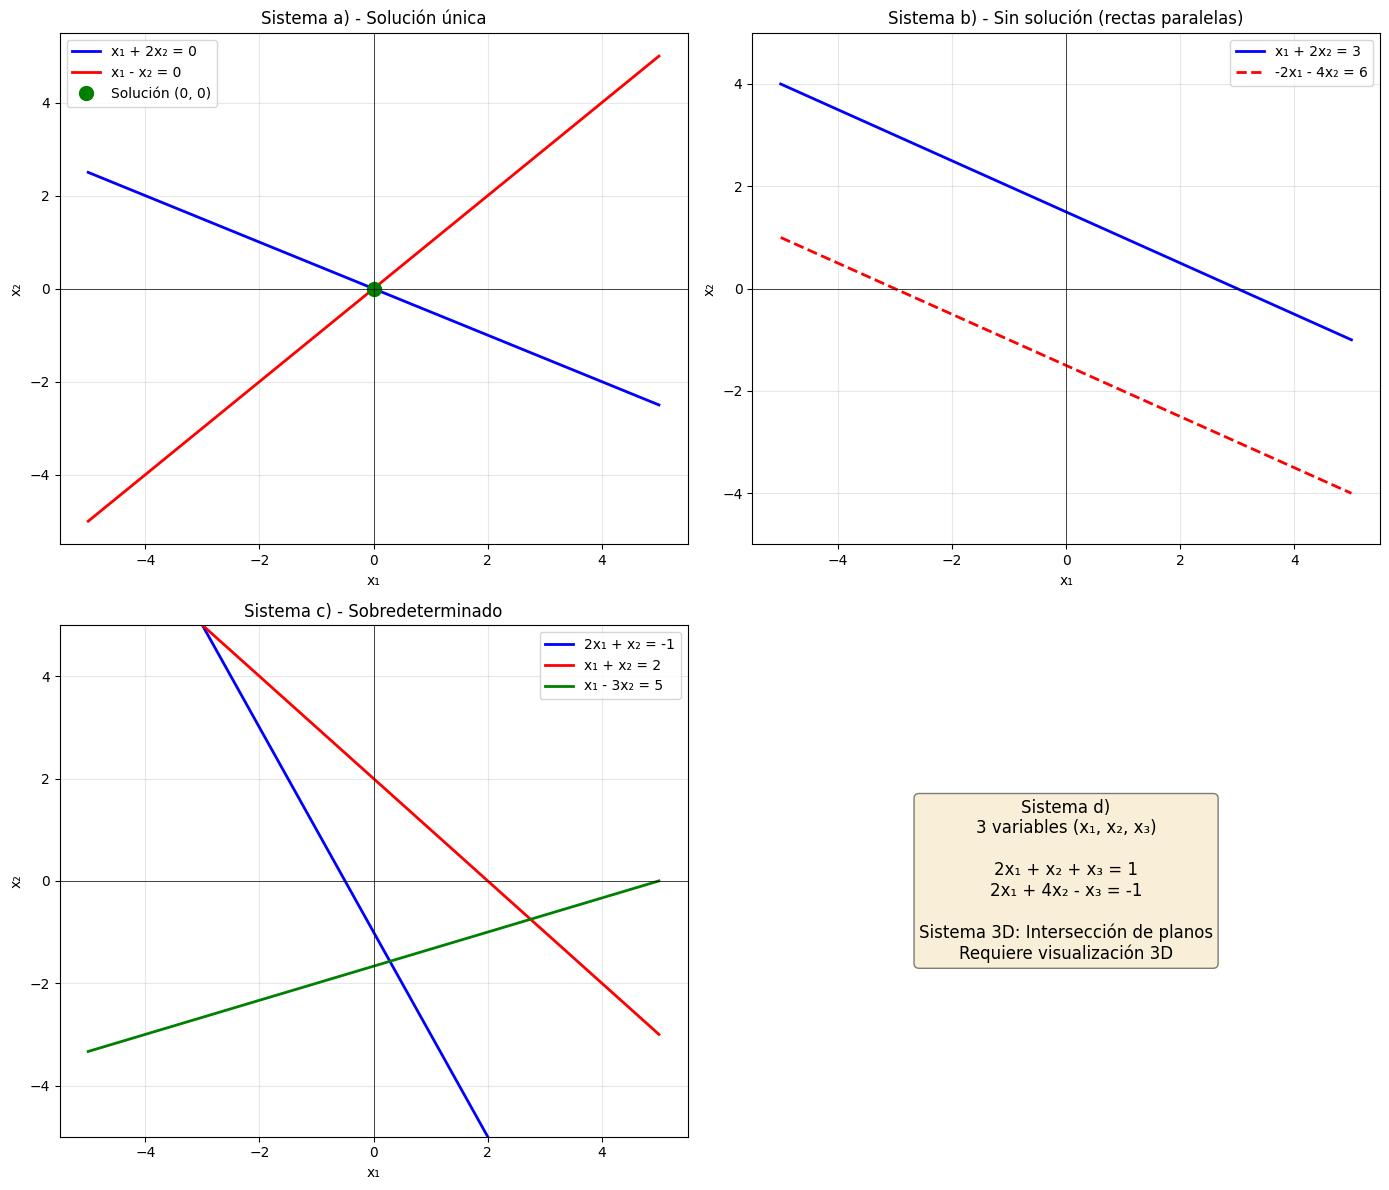

In [35]:
if __name__ == "__main__":
 
    print("TAREA 09: EJERCICIOS DE ELIMINACIÓN GAUSSIANA")

    
    ejercicio_1()
    ejercicio_2()
    ejercicio_3()
    ejercicio_4()
    ejercicio_5()
    ejercicio_6()
    ejercicio_7()